# CANDIDATE MACHINE LEARNING ALGORITHM TO PREDICT THE ELECTRICAL ENERGY OUT OF A PLANT

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


###### The dataset contains 9568 data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the power plant was set to work with full load. Features consist of hourly average ambient variables Temperature (T), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (EP)  of the plant.

In [2]:
#loading of CCPP data from Local Machine

df = pd.read_csv(r"C:\Users\patri\OneDrive\Desktop\Data Analytics\UCL\combined_cycle_power_plant.csv")

In [3]:
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [10]:
df.shape

(9568, 5)

In [16]:
df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


# Data Cleaning

In [17]:
df.isnull().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [18]:
###Outliers_Detection
#Boxplots
#Scatterplots
#Z-Score
#Inter Quatile Range(IQR)

In [19]:
df.head(0)

,AT,V,AP,RH,PE


In [20]:
col = ['AT','V','AP','RH','PE']


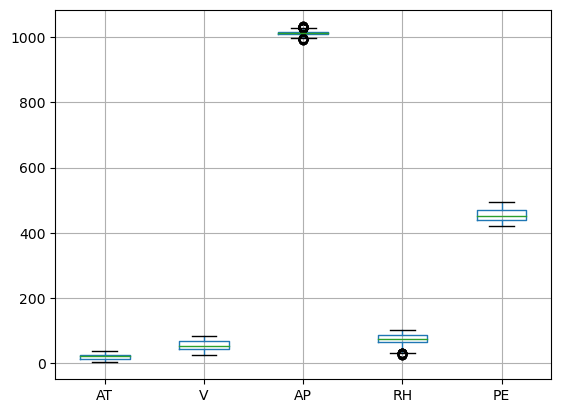

In [21]:
df.boxplot(col)
plt.show()

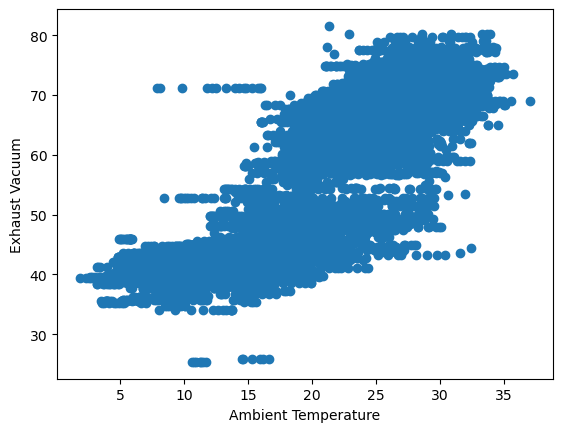

In [25]:
ax = plt.subplots()
plt.xlabel("Ambient Temperature")
plt.ylabel("Exhaust Vacuum")
plt.scatter(df['AT'], df['V'])
plt.show()

In [26]:
#Detecting Outliers using Z-Score

# Explorational Data Analysis

In [35]:
x = df.drop('PE', axis = 1)

In [36]:
y = df["PE"]

In [39]:
x

,AT,V,AP,RH
0,14.96,41.76,1024.07,73.17
1,25.18,62.96,1020.04,59.08
2,5.11,39.40,1012.16,92.14
3,20.86,57.32,1010.24,76.64
4,10.82,37.50,1009.23,96.62
...,...,...,...,...
9563,16.65,49.69,1014.01,91.00
9564,13.19,39.18,1023.67,66.78
9565,31.32,74.33,1012.92,36.48
9566,24.48,69.45,1013.86,62.39


In [40]:
y

0       463.26
1       444.37
2       488.56
3       446.48
4       473.90
         ...  
9563    460.03
9564    469.62
9565    429.57
9566    435.74
9567    453.28
Name: PE, Length: 9568, dtype: float64

In [44]:
##Training of Data

In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size = 0.2, random_state = 0)

 # Checking how mormal the data is

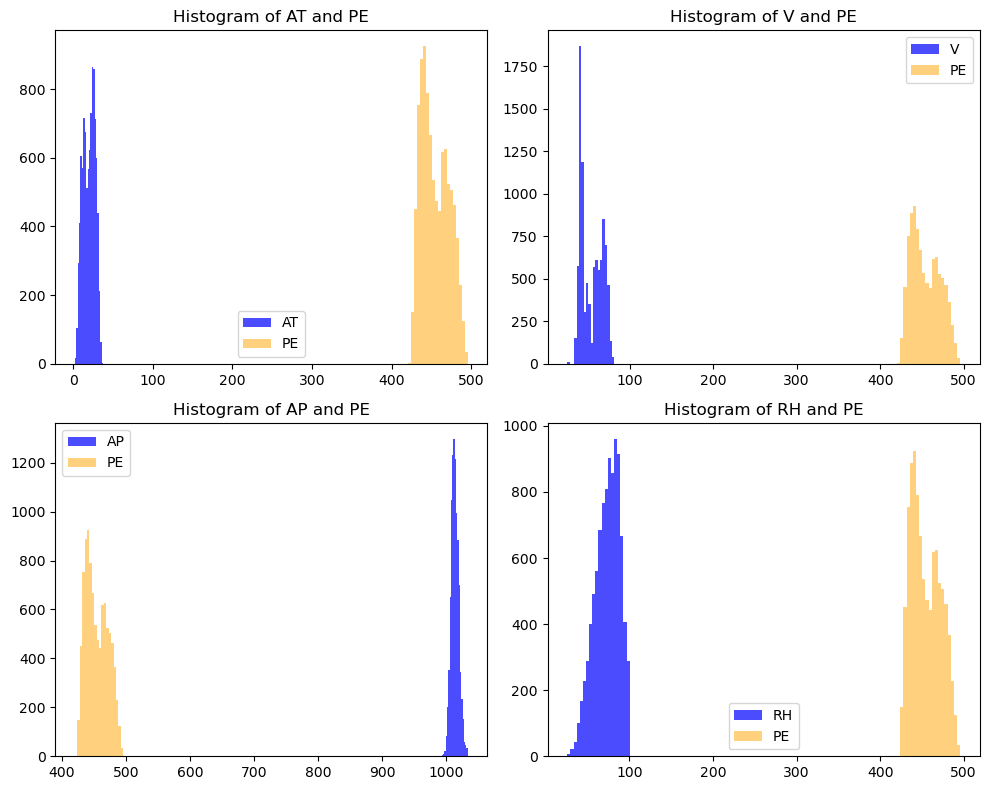

In [76]:
x_columns = ['AT', 'V', 'AP', 'RH']
x = df[x_columns]

# Create subplots for each independent variable
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Plot histograms for each independent variable
for i, ax in enumerate(axs.flatten()):
    ax.hist(x.iloc[:, i], bins=20, color='blue', alpha=0.7, label=x_columns[i])
    ax.hist(y, bins=20, color='orange', alpha=0.5, label='PE')
    ax.set_title(f'Histogram of {x_columns[i]} and PE')
    ax.legend()

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

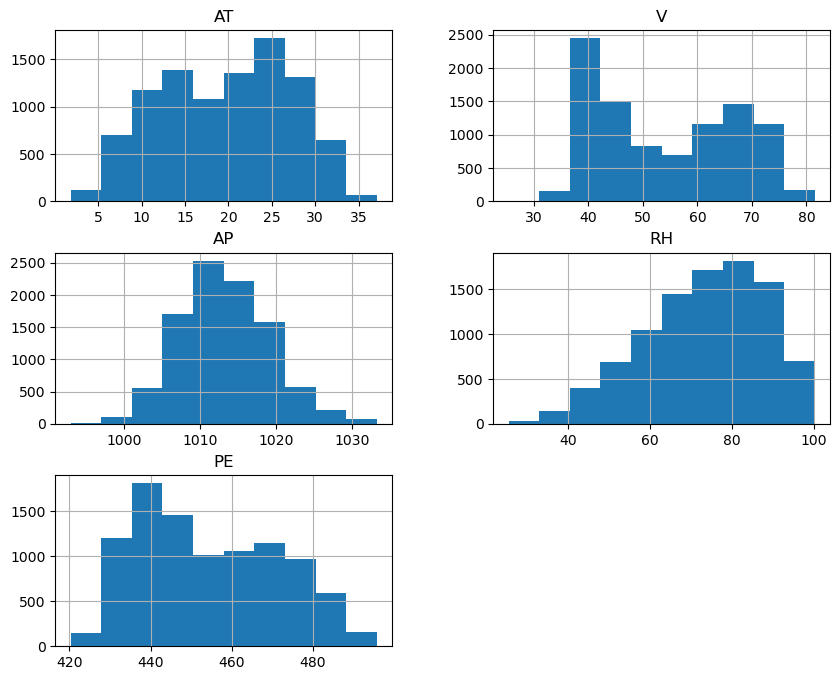

In [72]:
df.hist(figsize=(10,8))
plt.show()

## fit a Multiple regression

### Regardless of outliers since some of the data are not mormalized

In [48]:
from sklearn.linear_model import LinearRegression

In [49]:
ml = LinearRegression()
ml.fit(x_train,y_train)

LinearRegression()

In [50]:
ml.coef_

array([-1.97313099, -0.23649993,  0.06387891, -0.15807019])

In [51]:
ml.intercept_

452.84103716163804

In [52]:
## TO predict using the model

In [53]:
y_pred = ml.predict(x_test)

In [55]:
print(y_pred)

[431.42761597 458.56124622 462.75264705 ... 469.51835895 442.41759454
 461.88279939]


In [56]:
#checking the Accuracy of the model using r2_score

In [61]:
from sklearn.metrics import r2_score
Accuracy_prediction = r2_score(y_test,y_pred)*100

In [153]:
print(f'Accuracy (Accuracy_prediction): {Accuracy_prediction:.2f}%')

Accuracy (Accuracy_prediction): 93.25%


In [80]:
##Plotting a scattered plot for the prediction

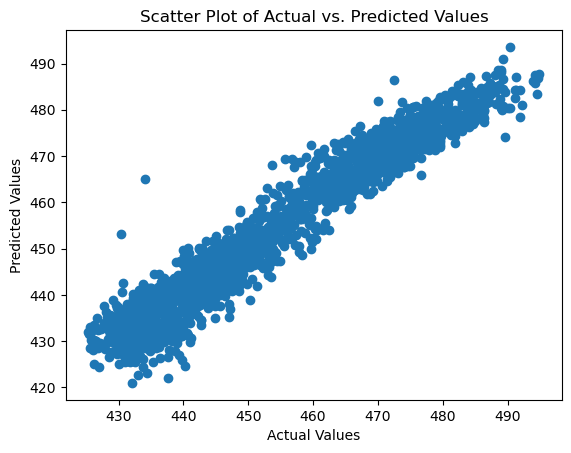

In [92]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Scatter Plot of Actual vs. Predicted Values")
plt.show()


In [94]:
y_pred_df= pd.DataFrame({'Actual values':y_test, 'Predicted Values':y_pred, 'Difference':y_test - y_pred})

In [97]:
y_pred_df.head(20)

,Actual values,Predicted Values,Difference
4834,431.23,431.427616,-0.197616
1768,460.01,458.561246,1.448754
2819,461.14,462.752647,-1.612647
7779,445.90,448.595962,-2.695962
7065,451.29,457.870777,-6.580777
9482,432.68,429.693839,2.986161
9,477.50,473.041853,4.458147
4986,459.68,456.508363,3.171637
6168,477.50,474.340491,3.159509
3664,444.99,446.343029,-1.353029


## using the z-score method to identify and remove outliers


In [100]:
df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [79]:
from scipy import stats

In [120]:
dfz = df

In [121]:
dfz

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


In [122]:
# Calculate z-scores for each column
z_scores = np.abs((dfz - dfz.mean()) / dfz.std())

In [123]:
z_scores.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,0.862323,0.916078,0.796987,0.823360,0.869293
std,0.506283,0.400892,0.603942,0.567457,0.494218
min,0.000165,0.000457,0.000155,0.000615,0.000292
25%,0.458743,0.646385,0.324827,0.360197,0.488369
50%,0.819697,0.982524,0.687165,0.747317,0.845784
75%,1.246731,1.174404,1.138125,1.180870,1.219020
max,2.394001,2.277782,3.429840,3.270418,2.425441


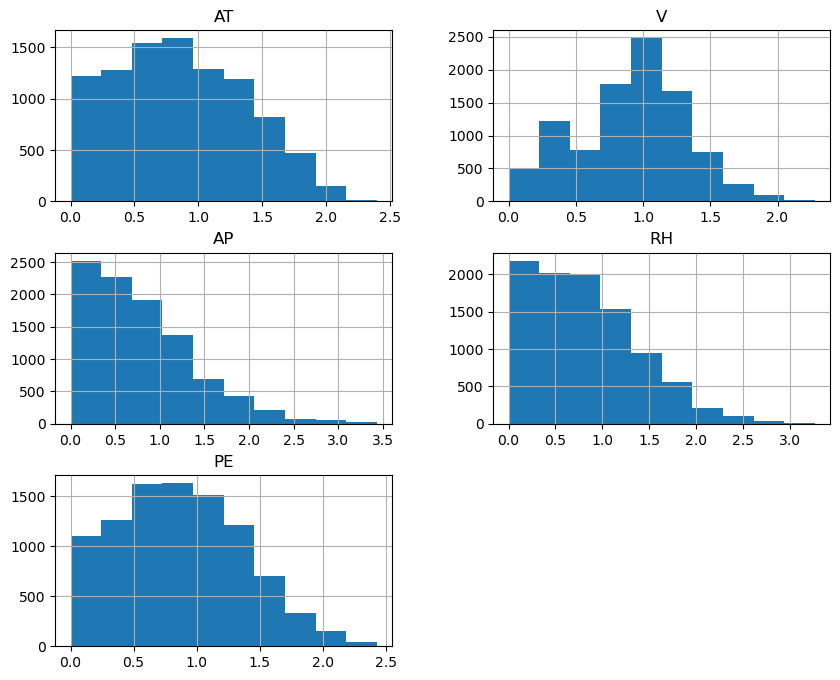

In [124]:
z_scores.hist(figsize=(10,8))
plt.show()

In [125]:
# Define a threshold for considering a data point as an outlier (e.g., z-score > 3)
outlier_threshold = 3

# Identify and remove outliers
dfz_no_outliers = dfz[(z_scores < outlier_threshold).all(axis=1)]

In [127]:
dfz_no_outliers.shape

(9510, 5)

In [128]:
df.shape

(9568, 5)

In [129]:
Row_removed = 9568 - 9510

In [130]:
Row_removed

58

In [131]:
# Therefore, 58 rows have been cleaned from the data

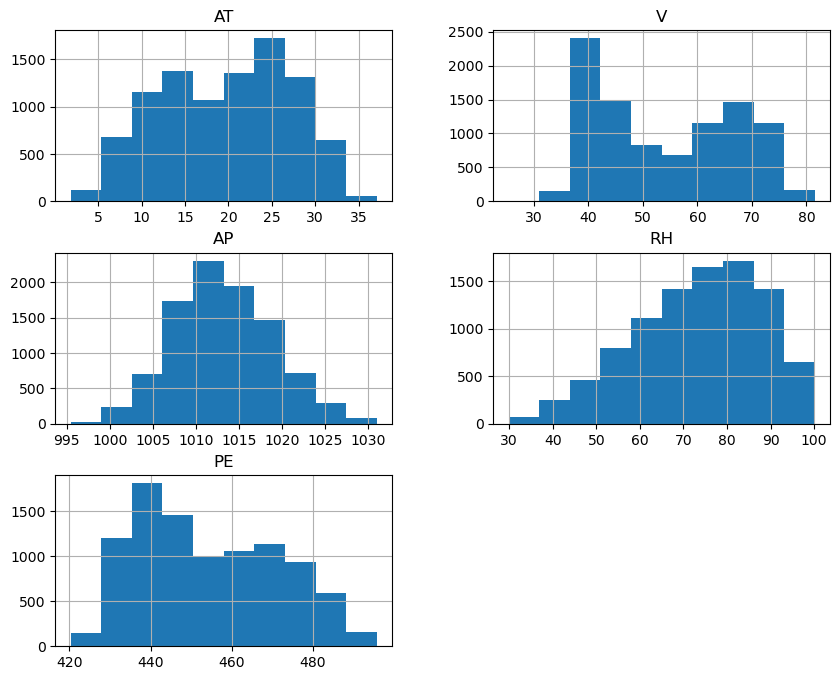

In [132]:
dfz_no_outliers.hist(figsize=(10,8))
plt.show()

## V and PE have been a bit distorted and not normalized, see below for the effect of the removal of outliers

In [134]:
df2 = dfz_no_outliers

In [136]:
df2.shape

(9510, 5)

In [137]:
df2.head(0)

,AT,V,AP,RH,PE


In [139]:
x1 = df2.drop('PE', axis = 1)

In [140]:
y1 = df2['PE']

In [143]:
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1, test_size = 0.2, random_state = 0)

In [146]:
ml1 = LinearRegression()
ml1.fit(x1_train,y1_train)

LinearRegression()

In [147]:
y1_pred = ml.predict(x1_test)

In [148]:
print(y1_pred)

[463.39295312 484.6140632  446.42538618 ... 480.85823919 445.5888458
 434.58199606]


In [151]:
Accuracy_outlier_removed = r2_score(y1_test,y1_pred)*100

In [152]:
print(f'Accuracy (Outlier Removed): {Accuracy_outlier_removed:.2f}%')

Accuracy (Outlier Removed): 92.80%


### OSERVATION: Inference, when the outliers got removed, the efficiency of the algorithm got affacted and accuracy dropped to 92.8% from 93.25%.

# DECISION TREE

In [158]:
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, train_test_split

#### Outliers not removed

###### Searching for the best max_depth value for my Decision Tree

In [212]:
# Create a Decision Tree regressor
regressor = DecisionTreeRegressor()

# Define a range of values for max_depth to search
param_grid = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

# Create a GridSearchCV object
grid_search = GridSearchCV(regressor, param_grid, cv=5)  # cv=5 means 5-fold cross-validation

# Fit the model to the data

grid_search.fit(x_train, y_train)

# Print the best parameter(s) and corresponding score
print("Best max_depth:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Evaluate the best model on the test set
best_regressor = grid_search.best_estimator_
test_score = best_regressor.score(x_test, y_test)
print("Test set score1:", test_score)
 


Best max_depth: {'max_depth': 8}
Best cross-validation score: 0.9389386395553505
Test set score1: 0.9397497470302139


In [253]:
max_depth = 8

In [254]:
# Creating a Decision Tree regressor
tree_regressor = DecisionTreeRegressor(max_depth=8)

In [255]:
tree_regressor.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=8)

In [256]:
#predictions on the test data
y_Dpred = tree_regressor.predict(x_test)

In [208]:
print(y_Dpred)

[433.66416667 458.16125    465.78122172 ... 469.34144068 439.28481481
 462.44884615]


In [209]:
#from Multiple regrssion
print(y_pred)

[431.42761597 458.56124622 462.75264705 ... 469.51835895 442.41759454
 461.88279939]


In [215]:
Accuracy_prediction_D1 = r2_score(y_test,y_Dpred)*100

In [217]:
Accuracy_prediction_D1

93.96062396017975

## Outliers removed

In [189]:
regressor = DecisionTreeRegressor()
param_grid = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

In [192]:
grid_search1 = GridSearchCV(regressor, param_grid, cv=5)
grid_search1.fit(x1_train, y1_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [226]:
# Print the best parameter(s) and corresponding score
print("Best max_depth:", grid_search1.best_params_)
print("Best cross-validation score:", grid_search1.best_score_)

# Evaluate the best model on the test set
best_regressor1 = grid_search1.best_estimator_
test_score1 = best_regressor1.score(x1_test, y1_test)
print("Test set score2:", test_score)

Best max_depth: {'max_depth': 7}
Best cross-validation score: 0.9392301312504806
Test set score2: 0.9397497470302139


In [227]:
max_depth = 7

In [229]:
##Decision Tree Test

In [259]:
# Creating a Decision Tree regressor
tree_regressor1 = DecisionTreeRegressor(max_depth=7)

In [260]:
tree_regressor1.fit(x1_train, y1_train)

DecisionTreeRegressor(max_depth=7)

In [261]:
#predictions on the test data
y_Dpred2 = tree_regressor1.predict(x1_test)

In [262]:
y_Dpred2

array([462.9217757 , 489.24409091, 443.7776378 , ..., 483.686     ,
       445.2718617 , 439.506875  ])

In [263]:
##Outliers not removed for Decision Tree Predicted Values

In [264]:
print(y_Dpred)

[433.66416667 458.16125    465.78122172 ... 469.34144068 439.28481481
 462.44884615]


In [265]:
Accuracy_predicted_D2 = r2_score(y1_test,y_Dpred2)*100

In [266]:
Accuracy_predicted_D2

93.27111911909643

# TO Test for the Predicted Value of the 1st PE using Multiple Regression and Decision Tree & Evaluate which of them give a close PE Value

In [267]:
df.head(1)

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26


In [268]:
# Miltilpe Regression for PE value

In [279]:
PE_M_Regression = ml.predict([[14.96,41.76,1024.07,73.17]])

C:\Users\patri\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [270]:
# Decision Tree for PE value

In [281]:
PE_D_Tree = tree_regressor.predict([[14.96,41.76,1024.07,73.17]])

C:\Users\patri\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [301]:
print(PE_M_Regression)

[467.29723807]


In [302]:
print(PE_D_Tree)

[463.32034483]


In [289]:
PE_Predicted_Compared = pd.DataFrame({"Regression Value": PE_M_Regression , "Decision Tree Value":PE_D_Tree, "Actual of PE":df.loc[0, 'PE']})

In [290]:
PE_Predicted_Compared

,Regression Value,Decision Tree Value,Actual of PE
0,467.297238,463.320345,463.26


### Conclusion: The above shows that Decision Tree holds much efficiency in the creation of a module that predicts hourly electrical energy output (EP)  of the plant.
